# Examen final módulo Inferencia Estadística
*Autor: Patricio Águila Márquez*

### Elección del Dataset para la primera y segunda parte

#### Contexto

- El set de datos seleccionado, corresponde a citas médicas en Brasil para sectores de bajos recursos. Lo anterior, se encuentra bajo el amparo de un programa de seguridad social llamado [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia). 

- Se trata de averiguar por qué el 30% de los pacientes no se presenta a su cita médica.  

- Por lo tanto, <span style='background:limegreen'>la principal pregunta será cuáles son los factores más relevantes para predecir si un paciente asistirá  o no  a su cita médica.</span>

#### Set de Datos

El dataset contiene 110.527 registros de citas médicas, asociados a 14 variables:
1. `PatientId`: Identificación del paciente.
2. `AppointmentID`: Identificación de cada cita.
3. `Gender`: Masculino o femenino. 
4. `ScheduledDay`: Día en que se realiza la reserva de la cita médica.
5. `AppointmentDay`: Día de la cita al médico.
6. `Age`: Edad del paciente.
7. `Neighbourhood`: El lugar donde ocurre la cita médica.

Las siguientes variables son booleanas:

8. `Scholarship`: Si la familia es beneficiaria del programa de salud con gratuidad o no.
9. `Hipertension`: Si el paciente tiene hipertención o no.
10. `Diabetes`: Si el paciente sufre diabetes o no.
11. `Alcoholism`: Si el paciente padece de alcoholismo o no.
12. `Handcap`: Si el paciente es minusválido  o no.
13. `SMS_received`: Si es que el paciente recibió uno o más mensajes de texto como recordatorio de su cita médica.
14. `No-show`: Indica **'No'** si el paciente llegó a su cita médica, y **'Yes'** si es que perdió su atención con el doctor.

Este set de datos fue obtenido desde la plataforma [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments)

### Limpieza y Transformación de los Datos

Primero que todo, importamos todos los packages a utilizar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-dark")
from sklearn import preprocessing

In [2]:
# lectura del dataset, y guardado en pandas dataframe en variable 'df'
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Inspección del dataframe

Mostrar tipos de datos y buscar instancias de valores faltantes o posiblemente erróneos.

In [3]:
# principales características del set de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


A primera vista no aparecen datos faltantes.

#### Limpieza de Datos

Renombrar columnas con estilo *snake_case*.

In [4]:
df.rename(columns = {'PatientId':'patient_id',
                     'AppointmentID':'appointment_id',
                     'Gender':'gender',
                     'ScheduledDay':'scheduled_day',
                     'AppointmentDay':'appointment_day',
                     'Age':'age',
                     'Neighbourhood':'neighbourhood',
                     'Scholarship':'scholarship',
                     'Hipertension':'hypertension',
                     'Diabetes':'diabetes',
                     'Alcoholism':'alcoholism',
                     'Handcap':'handicap',
                     'SMS_received':'sms_received',
                     'No-show':'no_show',
                    }
          , inplace = True)

Cambiar tipo de datos de variables.

In [5]:
df = df.astype({'patient_id':'int64',     # se cambia a 'int64' para poder ver el número completo
                'scholarship':'object',   # se cambia a variable categórica
                'hypertension':'object',  # se cambia a variable categórica
                'diabetes':'object',      # se cambia a variable categórica
                'alcoholism':'object',    # se cambia a variable categórica
                'handicap':'object',      # se cambia a variable categórica
                'sms_received':'object',  # se cambia a variable categórica
               })

df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])      # se cambia a variable tipo fecha
df['appointment_day'] = pd.to_datetime(df['appointment_day'])  # se cambia a variable tipo fecha

df.dtypes

patient_id                       int64
appointment_id                   int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                     object
hypertension                    object
diabetes                        object
alcoholism                      object
handicap                        object
sms_received                    object
no_show                         object
dtype: object

Chequear si hay valores duplicados en todas las columnas a excepción de `appointment_id`.

In [6]:
sum(df.duplicated(['patient_id',
                    'gender',
                    'scheduled_day',
                    'appointment_day',
                    'age',
                    'neighbourhood',
                    'scholarship',
                    'hypertension',
                    'diabetes',
                    'alcoholism',
                    'handicap',
                    'sms_received',
                    'no_show'
                    ]))

618

El resultado muestra que 618 `appointment_id` se encuentran duplicados, es decir, se asignó más de un ID de agendamiento a una misma cita médica, por lo que estos serán eliminados.

In [7]:
# borrar datos duplicados
df.drop_duplicates(['patient_id',
                    'gender',
                    'scheduled_day',
                    'appointment_day',
                    'age',
                    'neighbourhood',
                    'scholarship',
                    'hypertension',
                    'diabetes',
                    'alcoholism',
                    'handicap',
                    'sms_received',
                    'no_show'
                    ],inplace=True)

# validar que los datos repetidos fueron eliminados

sum(df.duplicated(['patient_id',
                    'gender',
                    'scheduled_day',
                    'appointment_day',
                    'age',
                    'neighbourhood',
                    'scholarship',
                    'hypertension',
                    'diabetes',
                    'alcoholism',
                    'handicap',
                    'sms_received',
                    'no_show'
                    ]))

0

Eliminar la columna `appointment_id` y `patient_id` ya que no agregan más valor al análisis.

In [8]:
df = df.drop(['appointment_id', 'patient_id'], axis=1)

Revisar si hay incosistencias en los datos. Para ello, se valida si existen edades negativas, o bien, que no correspondan a edades que una persona pueda tener (como por ejemplo, 150 años). 

In [9]:
df['age'].value_counts().sort_index()

-1         1
 0      3530
 1      2271
 2      1616
 3      1509
        ... 
 98        6
 99        1
 100       3
 102       2
 115       4
Name: age, Length: 104, dtype: int64

- Se observa una persona con edad negativa, por lo cual ese dato se descarta. 
- Por otra parte, podría dudarse que una persona pueda vivir más de 100 años, pero nos fiaremos que estos datos son reales, por lo cual los conservaremos. 
- También se conservan las edades que aparecen en cero, ya que estos datos corresponden a menores recién nacidos entre cero y un año.

In [10]:
# conservar valores del dataset mayores o iguales a cero
df = df[df.age >= 0]

#### Inspección de los Datos

Mostrar valores únicos por cada variable.

In [11]:
print('Número de valores únicos por variable: ')
display(df.nunique())

Número de valores únicos por variable: 


gender                  2
scheduled_day      103548
appointment_day        27
age                   103
neighbourhood          81
scholarship             2
hypertension            2
diabetes                2
alcoholism              2
handicap                5
sms_received            2
no_show                 2
dtype: int64

Mostrar a qué corresponde cada valor único en variables que tengan 5 o menos categorías.

In [12]:
print("Valores únicos en 'gender'       :{}".format(df.gender.unique()))
print("Valores únicos en 'scholarship'  :{}".format(df.scholarship.unique()))
print("Valores únicos en 'hypertension' :{}".format(df.hypertension.unique()))
print("Valores únicos en 'diabetes'     :{}".format(df.diabetes.unique()))
print("Valores únicos en 'alcoholism'   :{}".format(df.alcoholism.unique()))
print("Valores únicos en 'sms_received' :{}".format(df.sms_received.unique()))
print("Valores únicos en 'handicap'     :{}".format(df.handicap.unique()))
print("Valores únicos en 'no_show'      :{}".format(df.no_show.unique()))

Valores únicos en 'gender'       :['F' 'M']
Valores únicos en 'scholarship'  :[0 1]
Valores únicos en 'hypertension' :[1 0]
Valores únicos en 'diabetes'     :[0 1]
Valores únicos en 'alcoholism'   :[0 1]
Valores únicos en 'sms_received' :[0 1]
Valores únicos en 'handicap'     :[0 1 2 3 4]
Valores únicos en 'no_show'      :['No' 'Yes']


- Inspeccionar las columnas con formato fecha. 
- Obtener valores máximos y mínimos de las variables `scheduled_day` y `appointment_day`

In [13]:
# valores mínimos y máximos para el día de la cita médica
print(df.scheduled_day.min())
print(df.scheduled_day.max())

2015-11-10 07:13:56+00:00
2016-06-08 20:07:23+00:00


In [14]:
# valores mínimos y máximos para el día de agendamiento de la cita médica
print(df.appointment_day.min())
print(df.appointment_day.max())

2016-04-29 00:00:00+00:00
2016-06-08 00:00:00+00:00


- Se observa que los agendamientos ocurren en un rango de 7 meses aprox, desde nov-2015 a jun-2016.
- Por otro lado, las citas médicas ocurren en un rango de 5 semanas, desde fines de abr-2016 a principios de jun-2016.
- Notar que no se especifica la hora en que ocurre la cita médica. Hubiera sido interesante contar con este antecedente, ya que podría haber servido para detectar posibles patrones del porqué en ocasiones los pacientes no asiten a sus citas médicas.
- Dado lo anterior, se removerá la data que corresponde a la hora en las variables `scheduled_day` y `appointment_day`.

In [15]:
df['scheduled_day'] = df.scheduled_day.dt.date
df['appointment_day'] = df.appointment_day.dt.date

- Es necesario conocer el tiempo de espera entre agendamiento y la cita médica.
- Es por esta razón que se creará esta nueva variable.

In [16]:
# creación de la nueva variable
df['waiting_time'] = df['appointment_day'] - df['scheduled_day']
df['waiting_time'].dtypes

dtype('<m8[ns]')

In [17]:
# convertir a entero la nueva variable
df['waiting_time'] = df['waiting_time'].apply(lambda x: x.days)

In [18]:
# identificar valores negativos dentro de la variable nueva
df.waiting_time.value_counts().sort_index()

-6          1
-1          4
 0      38494
 1       5162
 2       6698
        ...  
 155       10
 162       11
 169        8
 176       16
 179       10
Name: waiting_time, Length: 131, dtype: int64

Dado que la fecha de agendamiento no puede ocurrir después de la cita, se eliminan estos valores negativos.

In [19]:
# eliminar valores negativos de la variable nueva tiempo de espera
df = df[df.waiting_time >= 0]

Finalmente, el dataset queda listo para los análisis estadísticos.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109903 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   gender           109903 non-null  object
 1   scheduled_day    109903 non-null  object
 2   appointment_day  109903 non-null  object
 3   age              109903 non-null  int64 
 4   neighbourhood    109903 non-null  object
 5   scholarship      109903 non-null  object
 6   hypertension     109903 non-null  object
 7   diabetes         109903 non-null  object
 8   alcoholism       109903 non-null  object
 9   handicap         109903 non-null  object
 10  sms_received     109903 non-null  object
 11  no_show          109903 non-null  object
 12  waiting_time     109903 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 11.7+ MB


In [21]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


### Primera Parte: Medidas de Tendencia Central

- Lo primero es seleccionar los datos a los que nos interesa medir su comportamiento, es decir, aquellos en donde no se concretó la cita con el doctor.
- Posteriormente, se elige una variable numérica para el cálculo de los estadísticos.

In [22]:
# filtrar datos, seleccionando aquellos pacientes que no se presentaron a la cita
yes_df = df[df['no_show'] == 'Yes']
yes_df.shape

(22100, 13)

- Posterior al filtrado, quedaron 22100 datos.
- La variable elegida es `waiting_time` (tiempo de espera).

In [23]:
# rapida vista de los datos agrupados por edad
yes_df.groupby('waiting_time')['waiting_time'].count()

waiting_time
0      1783
1      1099
2      1595
3       635
4      1223
       ... 
155       6
162       2
169       1
176       6
179       2
Name: waiting_time, Length: 111, dtype: int64

- Se procede a calcular la media o promedio, la mediana y la moda.

In [24]:
media = yes_df['waiting_time'].mean()
mediana = yes_df['waiting_time'].median()
moda = yes_df['waiting_time'].mode()

print('Media: {} \nMediana: {} \nModa: {}'.format(media, mediana, moda))

Media: 15.810633484162896 
Mediana: 11.0 
Moda: 0    0
dtype: int64


- En base a los cálculos de media, mediana y moda, se observa que los datos están más agrupados hacía la izquierda, por lo que no estariamos ante la presencia de datos con distribución normal.
- El valor más repetido es cero (1783 veces), lo que corresponde a atenciones realizadas dentro del mismo día de agendamiento.

### Segunda Parte: Medidas de Dispersión

- Rápidamente se podrían obtener las principales medidas de tendencia central y dispersión, aplicando el método `describe()`:

In [25]:
yes_df[['waiting_time']].describe()

,waiting_time
count,22100.000000
mean,15.810633
std,16.612104
min,0.000000
25%,4.000000
50%,11.000000
75%,23.000000
max,179.000000


- Por otra parte, se puede obtener de forma manual las medidas de dispersión:

In [26]:
# calcular rango
rango = yes_df['waiting_time'].max() - yes_df['waiting_time'].min()
# calcular desviacion estandar
std = yes_df['waiting_time'].std()
#calcular cuartiles
Q1 = yes_df['waiting_time'].quantile(q=0.25)
Q2 = yes_df['waiting_time'].median()
Q3 = yes_df['waiting_time'].quantile(q=0.75)
# calcular valor minimo y maximo
min_val = yes_df['waiting_time'].quantile(q=0)
max_val = yes_df['waiting_time'].quantile(q=1.0)
# imprimir los valores obtenidos
print(
"""
std: {}
min: {}
25%: {}
50%: {}
75%: {}
max: {}
""".format(round(std,1), min_val, Q1, Q2, Q3, max_val))


std: 16.6
min: 0.0
25%: 4.0
50%: 11.0
75%: 23.0
max: 179.0



- Se crea un histograma para visualizar cómo quedan representados los datos respecto al tiempo de espera.

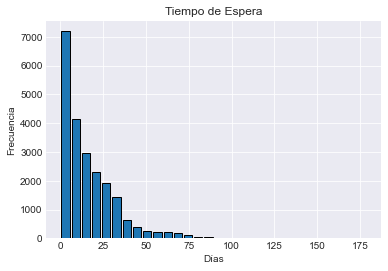

In [27]:
# variable elegida: tiempo de espera
# en la representación gráfca se observa la forma que toma esta distribución de datos
yes_df['waiting_time'].plot.hist(bins=30, edgecolor="black", rwidth=0.8, grid=True,)
plt.title('Tiempo de Espera');
plt.xlabel('Días');
plt.ylabel('Frecuencia');
plt.show()

- Se observa que la distribución de los datos es asimétrica. 
- Ello se puede medir mediante un coeficiente de asimetría.

In [28]:
yes_df['waiting_time'].skew()

2.177259264390076

- Al ser este coeficiente positivo, indica que la 'cola' de la distribucion de datos está hacia la derecha.
- Si fuera negativo su cola estaría hacia la izquierda, y si fuera cercano a cero, tendería a ser una distribución simétrica, lo cual no es el caso.

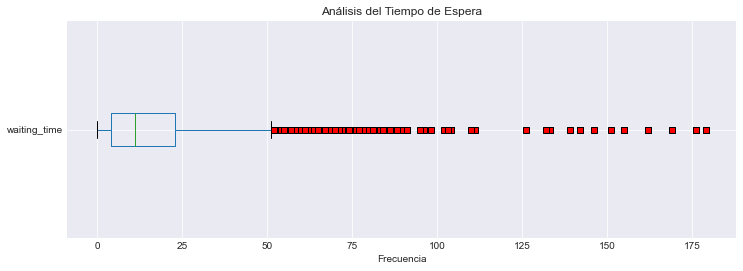

In [29]:
# se crea un boxplot, para una mejor visualización de datos atípicos
plt.figure(figsize=(12,4))
red_square = dict(markerfacecolor='r', marker='s')
yes_df.boxplot(column='waiting_time', vert=False, flierprops=red_square);
plt.title('Análisis del Tiempo de Espera');
plt.xlabel('Frecuencia');

- Se pueden apreciar valore atípicos, los cuales figuran cuando el tiempo de espera es mayor a 50 días aproximadamente.
- Los valores atípicos a menudo indican un error de medición o que los datos tienen una distribución con una cola muy larga (como en este escenario).

In [30]:
# se observa un nula correlacion entre las variables
yes_df.corr(method='pearson')

,age,waiting_time
age,1.000000,0.003531
waiting_time,0.003531,1.000000


- Dado que entre las únicas variables numéricas del dataset no existe una correlación, no se puede concluir a priori las razones por las cuales las personas no asisten a sus citas médicas. 
- Se precisa de otras herramientas del machine learning para poder resolver este caso, como por ejemplo **Naive Bayes** (muy usado para variables categóricas), **Random Forest**, entre otros.

### Tercera Parte: Normalización y Correlación

- Dado que no se observa correlación entre las dos variables numéricas del dataframe anterior, se usará otro dataset para este apartado.
- El dataset se llama "Analizando a los peores conductores de Estados Unidos".
- Fuente de origen: [Github](https://github.com/fivethirtyeight/data/tree/master/bad-drivers)

In [31]:
# Se guarda el set de datos en una variable 
# y vemos de que tipo es cada variable y si hay valores nulos
df = pd.read_csv('bad-drivers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                  --------------  -----  
 0   State                                                                                                   51 non-null     object 
 1   Number of drivers involved in fatal collisions per billion miles                                        51 non-null     float64
 2   Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                    51 non-null     int64  
 3   Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                            51 non-null     int64  
 4   Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                     

- Se observa una variable categórica y 7 variables numéricas.
- No hay valores perdidos o nulos.
- Se procede a cambiar el nombre a las variables para facilitar su lectura.

In [32]:
new_features = ["state", 
                "num_driver_fatal", 
                "percent_speeding", 
                "percent_alcohol", 
                "percent_not_dis", 
                "percent_no_prev", 
                "insur_prem", 
                "loss_per_insur_driver"]
df=df.rename(columns=dict(zip(df.columns,new_features)))

#### Variables
- `state`: estado.
- `num_driver_fatal`: número de conductores involucrados en colisiones fatales por mil millones de millas.
- `percent_speeding`: Porcentaje de conductores involucrados en colisiones fatales que iban a exceso de velocidad.
- `percent_alcohol`: Porcentaje de conductores involucrados en colisiones fatales que estaban bajo los efectos del alcohol.
- `percent_not_dis`: Porcentaje de conductores involucrados en colisiones fatales que no se distrajeron.
- `percent_no_prev`: Porcentaje de conductores involucrados en colisiones fatales que no habían estado involucrados en ningún accidente anterior.
- `insur_prem`: Primas de seguro de automóvil (USD).
- `loss_per_insur_driver`: Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado (USD).

#### Análsis de correlación entre variables

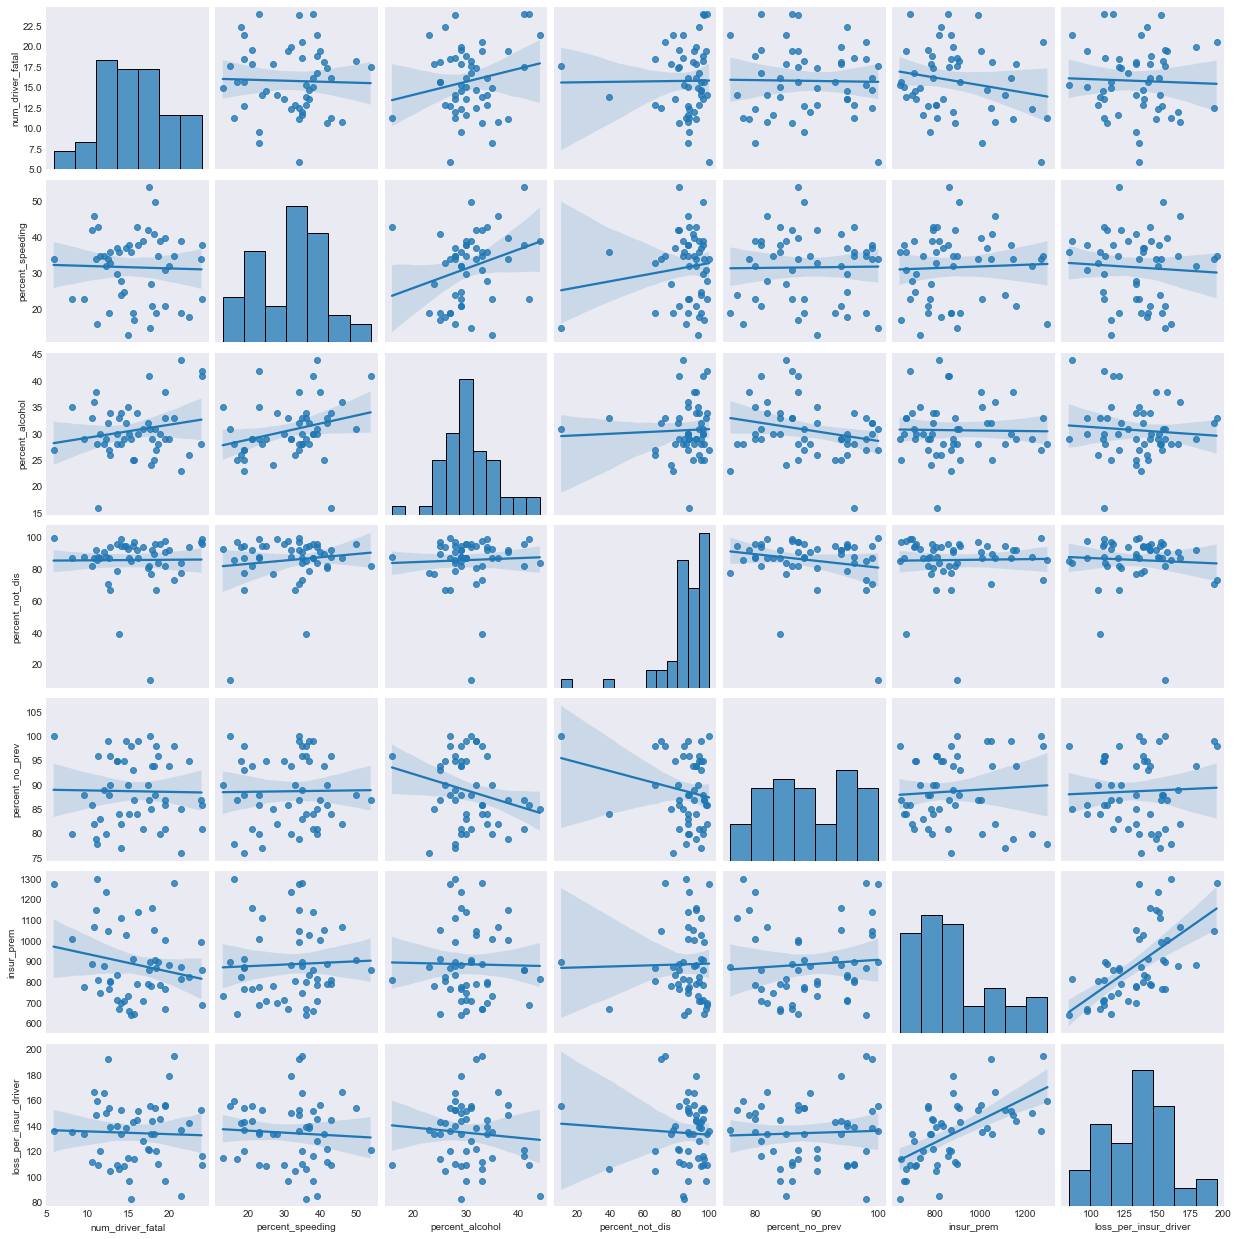

In [33]:
# buscar mediante una línea de regresión variables que tengan algún tipo de correlación 
# graficar la distribución de datos de cada variable
sns.pairplot(df, kind='reg')
plt.show()

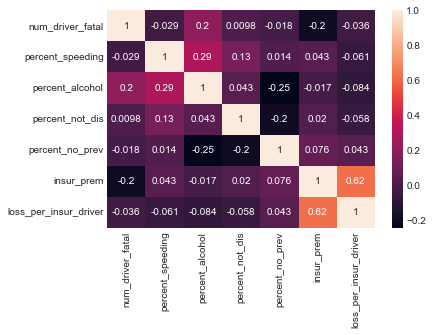

In [34]:
# graficar matriz de correlación
sns.heatmap(df.corr(), annot=True)
plt.show()

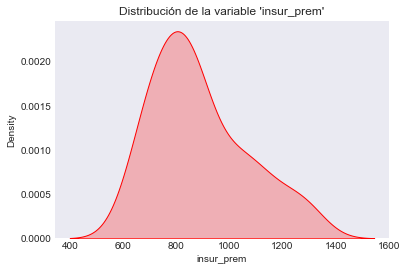

In [35]:
# distribución de la variable 'insur_prem'
sns.kdeplot(df['insur_prem'], legend=False, color="red", shade=True)
plt.title("Distribución de la variable 'insur_prem'")
plt.show()

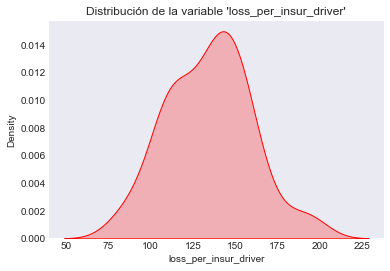

In [36]:
# distribución de la variable 'loss_per_insur_driver'
sns.kdeplot(df['loss_per_insur_driver'], legend=False, color="red", shade=True)
plt.title("Distribución de la variable 'loss_per_insur_driver'")
plt.show()

- Existe una correlación positiva de **0.62** entre el monto del seguro pagado por los conductores `insur_prem` y las pérdidas sufridas por las empresas debido a las colisiones `loss_per_insur_driver`.
- Ahora, realicemos la misma tarea, pero con las variables normalizadas.

#### Normalización de variables

- Usando cada uno de los métodos vistos en clase, se realiza la normalización de las variables de estudio.
- Se procede a graficar, comparando los resultados de cada ejercicio.

In [37]:
# variable sin normalizar
raw = df[['insur_prem','loss_per_insur_driver']]

In [38]:
# normalización mínimo-máximo
scaler = preprocessing.MinMaxScaler()
min_max = scaler.fit_transform(raw)
min_max = pd.DataFrame(min_max, columns =['insur_prem','loss_per_insur_driver'])

In [39]:
# normalización z-score
scaler = preprocessing.StandardScaler()
z_score = scaler.fit_transform(raw)
z_score = pd.DataFrame(z_score, columns =['insur_prem','loss_per_insur_driver'])

In [40]:
# normalizacion con tangente hiperbolica
p = 1000
tan_h = raw.apply(lambda x: np.tanh(x/p))

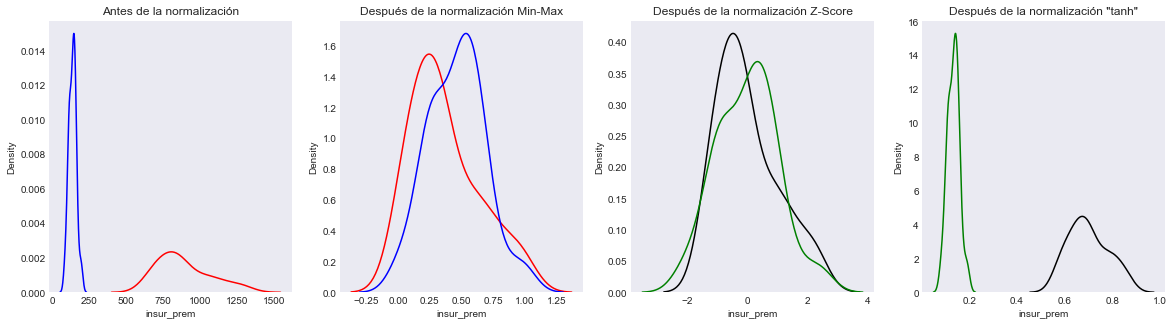

In [41]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Antes de la normalización')
sns.kdeplot(raw['insur_prem'], ax = ax1, color ='r')
sns.kdeplot(raw['loss_per_insur_driver'], ax = ax1, color ='b')

ax2.set_title('Después de la normalización Min-Max')
sns.kdeplot(min_max['insur_prem'], ax = ax2, color ='red')
sns.kdeplot(min_max['loss_per_insur_driver'], ax = ax2, color ='blue')

ax3.set_title('Después de la normalización Z-Score')
sns.kdeplot(z_score['insur_prem'], ax = ax3, color ='black')
sns.kdeplot(z_score['loss_per_insur_driver'], ax = ax3, color ='g')

ax4.set_title('Después de la normalización "tanh"')
sns.kdeplot(tan_h['insur_prem'], ax = ax4, color ='black')
sns.kdeplot(tan_h['loss_per_insur_driver'], ax = ax4, color ='g')
plt.show()

In [42]:
raw.corr(method='pearson')

,insur_prem,loss_per_insur_driver
insur_prem,1.000000,0.623116
loss_per_insur_driver,0.623116,1.000000


- Se probaron todos los tipos de escalamientos vistos en clase.
- Si bien el resultado de correlación es el mismo tanto con la data sin escalar como escalada, la ganancia de normalizar viene dada por un mejor desempeño de tiempo de procesamiento de datos.
- Esto adquiere relevancia cuando se trabaja con grandes volúmenes de datos.
- De los tres métodos de escalamiento vistos, el mejor sería el Z-Score, en donde comparativamente resultan más similares las curvas de las variables de estudio.

### Cuarta Parte: Data set `penguins`

- Cargar dataset.
- Observar tipo de variables y presencia de datos nulos.

In [43]:
# carga del dataset
df = sns.load_dataset('penguins')
# informacion del set de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


- Ver primeras columnas del conjunto de datos.
- Identificar qué variables presentan datos nulos.
- Eliminar del dataset los datos nulos.

In [44]:
# ver primeros cinco datos
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [45]:
# identificar variables null
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [46]:
# eliminar variables null
df = df.dropna()

#### Comparación de dos variables
- Seleccionar dos variables y someterlas a comparación.
- Usar gráficas del tipo `joinplot` y `boxplot`.

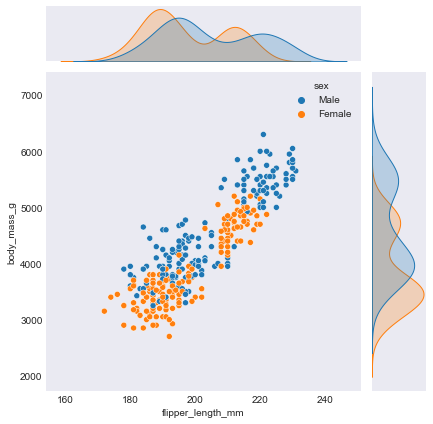

In [47]:
# jointplot
sns.jointplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='sex')
plt.show()

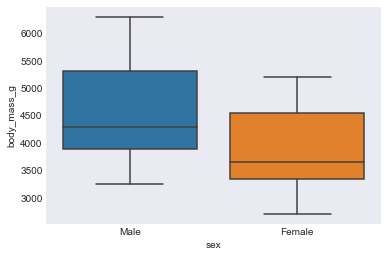

In [48]:
# boxplot
sns.boxplot(data=df, x='sex', y='body_mass_g')
plt.show()

- Visualmente, se aprecia una correlación positiva entre el tamaño de las aletas `flipper_length_mm` y la masa corporal `body_mass_g` (ver gráfico tipo 'jointplot').
- También se puede señalar que los especímenes machos tienen mayor masa corporal `body_mass_g` que las hembras (ver gráfico tipo 'boxplot').

#### Correlación entre variables y matriz de covarianza
- Se construye un 'pairplot' para visualizar la distribución (diagonal principal) y grado de relación entre variables.
- Posteriormente, se estima el grado de correlación entre variables.

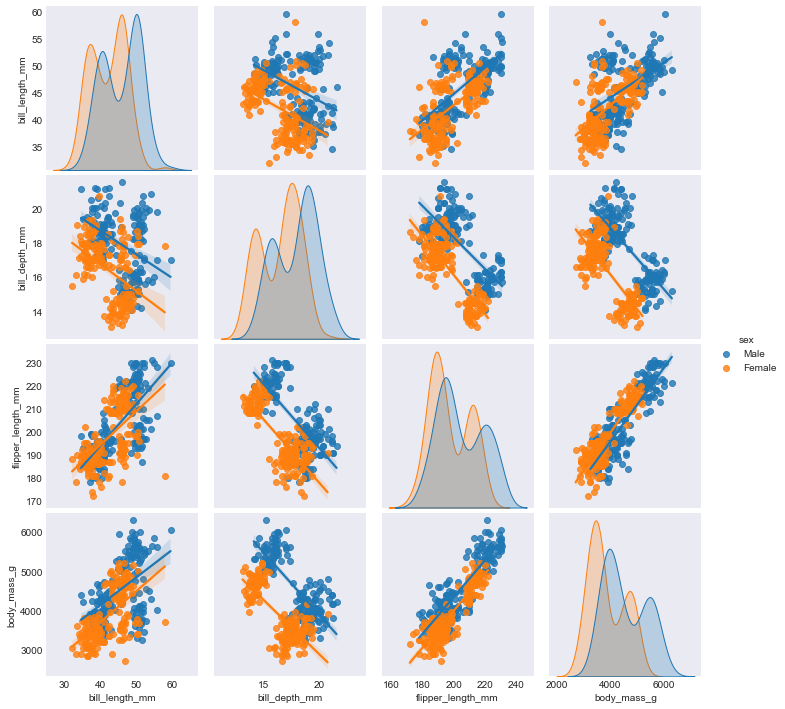

In [49]:
# pairplot
sns.pairplot(df, kind='reg', hue='sex')
plt.show()

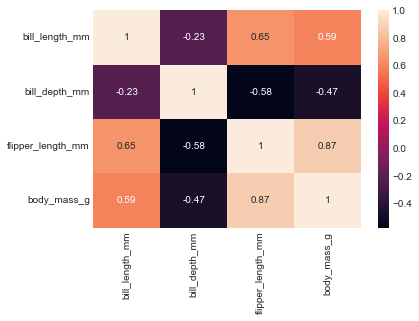

In [50]:
# matriz de covarianza
sns.heatmap(df.corr(), annot=True)
plt.show()

 - Se observa una correlación positiva fuerte entre las variables `flipper_length_mm` y `body_mass_g` de 0.87.
 - Se observa una correlación positiva mediana a fuerte entre las variables `bill_length_mm` y `flipper_length_mm` de 0.65.
 - Se observa una correlación positiva mediana a fuerte entre las variables `bill_length_mm` y `body_mass_g` de 0.59.
 - Se observa una correlación negativa baja entre las variables `bill_length_mm` y `bill_depth_mm` de -0.23.
 - Se observa una correlación negativa media entre las variables `bill_depth_mm` y `body_mass_g` de -0.47.
 - Se observa una correlación negativa media entre las variables `bill_depth_mm` y `flipper_length_mm` de -0.58.